# Project Name: IPL Socre Prediction using ML and TPOT Auto ML Library


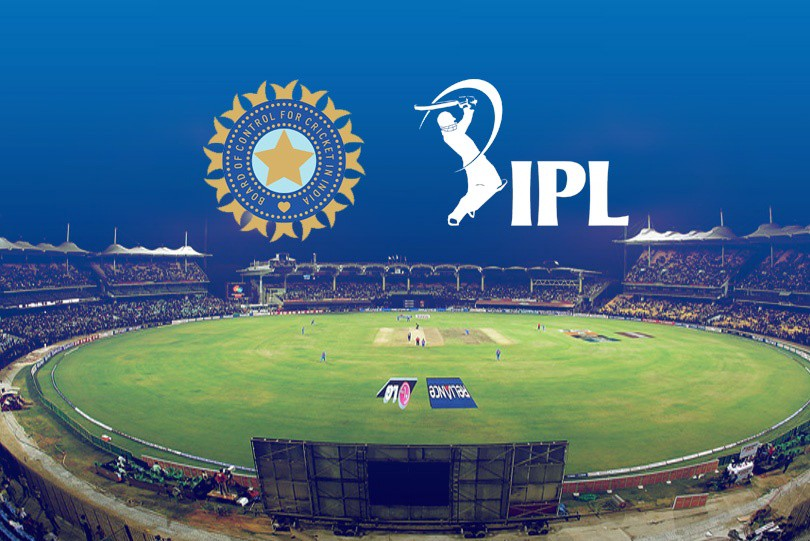

### In this project we will try to predict the final score of a match if sufficient conditons are given.

### As we know IPL is one of the biggest flex when it comes to Cricket all over the world. It would be very exciting to work on a Data Set which gives us the insight of the Data of different matches.

### We will be doing all the Data Cleaning techniques and anlysing our data, then finally predicting our results comparing different models and then we will see how we can use Auto ML for the same. We will be using TPOT Auto ML library for the project.

### Let us have a look on the TimeLine for our Project:
- Importing Libraries and DataSet
- Data Analysis and Cleaning
- Data Preprocessing
- Model Building using ML models
- Model Building and Predictions using Auto ML Library i.e TPOT Library 

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading our DataSet

In [ ]:
df= pd.read_csv("ipl.csv")

In [ ]:
df.head()

### Understanding our Data Set.
### The dataset consists of 15 columns:
- mid: The match id to uniquely identify each match.

- date: The date on which the match was held.

- venue: The name of the stadium.

- bat_team: The batting team name.

- bowl_team: The bowling team name.

- batsman: The name of the batsman.

- bowler: The name of the bowler.

- runs: The runs scored till now.

- wickets: The wickets taken till now.

- overs: The number of overs bowled.

- runs_last_5: The number of runs scored in last 5 overs.

- wickets_last_5: The number of wickets taken in last 5 overs.

- striker: The name of the batsmen on the batting end.

- non-striker: The name of the batsmen on the bowling end.

- total: The total number of runs scored in the match.

## Data Analysis and Cleaning


### First we will remove all unwanted columns from the DataSet

In [ ]:
unwanted_columns = ['mid', 'venue', 'batsman', 'bowler', 'striker', 'non-striker']
df.drop(labels=unwanted_columns, axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
df['bat_team'].unique()

### We will select some popular teams for our Model

In [ ]:
selected_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Daredevils', 'Sunrisers Hyderabad']

In [ ]:
## Keeping only Selected teams in our Data Set
df = df[(df['bat_team'].isin(selected_teams)) & (df['bowl_team'].isin(selected_teams))]

### We will remove the first 5 overs of the match as they shows no significance on deciding which team will win the match.

In [ ]:
df = df[df['overs']>=5.0]

In [ ]:
df.head()

### Seeing our Selected Teams

In [ ]:
print(df['bat_team'].unique())
print(df['bowl_team'].unique())

### We need to convert our Date from string to Date Time object

In [ ]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [ ]:
df.head()

### Data Preprocessing

### We will do One Hot Encoding for our Categorical Variables

In [ ]:
model_df = pd.get_dummies(data=df, columns=['bat_team', 'bowl_team'])

In [ ]:
model_df.head()

In [ ]:
model_df.columns

#### Rearranging our Columns

In [ ]:
model_df = model_df[['date', 'bat_team_Chennai Super Kings', 'bat_team_Delhi Daredevils', 'bat_team_Kings XI Punjab',
              'bat_team_Kolkata Knight Riders', 'bat_team_Mumbai Indians', 'bat_team_Rajasthan Royals',
              'bat_team_Royal Challengers Bangalore', 'bat_team_Sunrisers Hyderabad',
              'bowl_team_Chennai Super Kings', 'bowl_team_Delhi Daredevils', 'bowl_team_Kings XI Punjab',
              'bowl_team_Kolkata Knight Riders', 'bowl_team_Mumbai Indians', 'bowl_team_Rajasthan Royals',
              'bowl_team_Royal Challengers Bangalore', 'bowl_team_Sunrisers Hyderabad',
              'overs', 'runs', 'wickets', 'runs_last_5', 'wickets_last_5', 'total']]

#### Splitting our Date into Train and Test Data

In [ ]:
X_train = model_df.drop(labels='total', axis=1)[model_df['date'].dt.year <= 2016]
X_test = model_df.drop(labels='total', axis=1)[model_df['date'].dt.year >= 2017]

In [ ]:
y_train = model_df[model_df['date'].dt.year <= 2016]['total'].values
y_test = model_df[model_df['date'].dt.year >= 2017]['total'].values

### Now we have no need for our Data Column so we will drop it.

In [ ]:
X_train.drop(labels='date', axis=True, inplace=True)
X_test.drop(labels='date', axis=True, inplace=True)

In [ ]:
X_train.head()

### Model Building using ML Models

### We will be using the following models in this project:
- Lasso Regression
- Random Forest Regression
#### We will be using Grid Search CV for Hypertuning our model

## Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lasso=Lasso()

params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}

In [ ]:
lasso_regressor=GridSearchCV(lasso,params,scoring='neg_mean_squared_error',cv=5)

In [ ]:
lasso_regressor.fit(X_train,y_train)

In [ ]:
print(lasso_regressor.best_params_)

In [ ]:
lasso=Lasso(alpha =1)

In [ ]:
lasso.fit(X_train,y_train)

In [ ]:
pred= lasso.predict(X_test)

### Evaluation

In [ ]:
sns.distplot(y_test-pred)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

#### Defining Param

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 800, num = 4)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=1, random_state=42, n_jobs = -1)


In [ ]:
rf_random.fit(X_train, y_train)

In [ ]:
rf_random.best_params_

In [ ]:
pred1 = rf_random.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred1))
print('MSE:', metrics.mean_squared_error(y_test, pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred1)))

In [ ]:
sns.distplot(y_test-pred1)

## Using Auto ML

### Automated machine learning, also referred to as automated ML or AutoML, is the process of automating the time-consuming, iterative tasks of machine learning model development.

## TPOT Auto ML

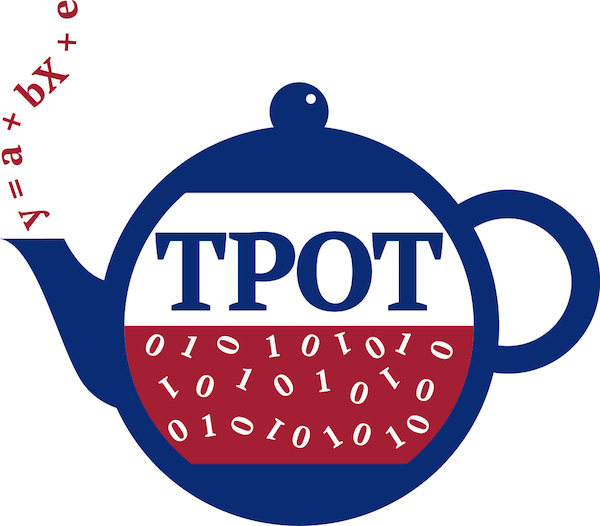

### TPOT is a Python Automated Machine Learning tool that optimizes machine learning pipelines using genetic programming.

### Installing TPOT

In [ ]:
!pip install tpot

In [ ]:
# check tpot version
import tpot
print('tpot: %s' % tpot.__version__)

In [ ]:
from tpot import TPOTRegressor

### We will use the same data which we used above

### First, we can define the method for evaluating models. We will use a good practice of repeated k-fold cross-validation with three repeats and 10 folds.

In [ ]:
from sklearn.model_selection import RepeatedKFold

In [ ]:
# define evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#### Defining our model

In [ ]:
# define search
model = TPOTRegressor(generations=5, population_size=50, scoring='neg_mean_absolute_error', cv=cv, verbosity=2, random_state=1, n_jobs=-1)

In [ ]:
# perform the search
model.fit(X_train, y_train)

In [ ]:
print(model.score(X_test, y_test))

### Finding the best pipeline

In [ ]:
model.fitted_pipeline_

In [ ]:
pred= model.predict(X_test)

### Checking Accuracy

In [ ]:
sns.distplot(y_test-pred)

In [ ]:
plt.scatter(y_test,pred)

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

In [ ]:
from sklearn.metrics import r2_score
print("r2_score is",r2_score(y_test, pred))